<a href="https://colab.research.google.com/github/tracieschroeder/CodingCamp/blob/main/3_Muon_mass_Mine_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating Invariant Mass

This activity uses data from the [CMS detector](https://cms.cern/detector) at CERN in Geneva, Switzerland. We've used this in [Quarknet's Data Camp at Fermilab](https://quarknet.org/page/data-camp-description) for several years to help teachers learn about particle physics.

To get started,
- You won't hurt anything by experimenting. If you break it, close the tab and open the activity again to start over.
- Is this your first time? Need a refresher? Try the 5-minute [Intro to Coding activity](./intro.ipynb) and come back here.

When you're ready, run each code cell until you get down to **Part One**.

In [ ]:
# imports some software packages we'll use
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# a hashtag tells the program "don't read the rest of the line"
# That way we can write "comments" to humans trying to figure out what the code does

data = pd.read_csv('https://github.com/adamlamee/HEP-data/raw/master/muons.csv')
# units in these files are energy, E (in GeV) and momentum, p (in GeV/c)

# The .head(n) command displays the first n rows of a file.
data.head(3)

,Run,Event,E,px,py,pz
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210


In [ ]:
# .shape displays the (number of rows , number of columns)
data.shape

(475465, 6)

## Part One
Get acquainted with this data set. It represents muons produced in a proton-proton collision (called an *event*). Look at the cells above to find the answers to the following questions:
- In the table above, what do you think each of the column headings represent? After you discuss with your partner, take a look at the [key](https://github.com/QuarkNet-HEP/coding-camp/blob/main/CMS_data_headings.md).
- How many events does this data set contain?

## Part Two
Each muon has momentum and since they travel in 3 dimensions the momentum has three components. You can calculate the total momentum with the Pythogorean Theorem:
- In 2 dimensions, it's the familiar:
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup>


- In 3 dimensions, it looks like:
|p|<sup>2</sup> = p<sub>x</sub><sup>2</sup> + p<sub>y</sub><sup>2</sup> + p<sub>z</sub><sup>2</sup>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/Coord_XYZ.svg/2000px-Coord_XYZ.svg.png" alt="Drawing" width="200" height="200"/>

Try editing the code in the cell below to calculate the muon's total momentum.

When you're ready, scroll down to **Part 3**.

In [ ]:
# You can specify a column by data['column name']
# This adds a column and fills it with E+px^2 for each event
data['PTotal'] = (data['px']**2 + data['py']**2 + data['pz']**2)**0.5        # this calculates nothing useful at all
data.head(3)

,Run,Event,E,px,py,pz,PTotal
0,165617,74601703,9.69873,-9.51043,0.366205,1.86329,9.698156
1,165617,75100943,6.20385,-4.26661,0.456545,-4.47930,6.202945
2,165617,75587682,19.28920,-4.21208,-0.651623,18.81210,19.288892


## Part Three
Here's where special relativity comes in. A particle's **energy** is due to both it's **mass** and **momentum**. This equation is also similar to the Pythagoream theorem:

<center>energy<sup>2</sup> = mass<sup>2</sup> + momentum<sup>2</sup></center>

*Mass* in this equation is called the particle's *invariant mass* because it is a value all observers would agree on, regardless of their reference frame. The code below creates a column for the mass of the muon, but the equation isn't quite right.
- Edit the code in the cell below to *really* calculate the muon's mass.
- How could your equation produce some imaginary numbers?

When you're ready, scroll down to **Part 4**.

The energy it takes to create mass from a particle
Plot energy and momentum of an event. Line with a slope of 1. Looks like the y vaules are the same as the x values. For momentum of 5 there is an energy of 5. Implies something about the mass. If e squared and p squared are the same number maybe the p and e are not identical, the slope of 1 are really close to identical. Why would the mass be really small in relation to the other numbers? Some interaction caused them to move really, really fast. Not a bulldozer or a car or even a bullet moving supersonically. So something imparted all of that energy to the particle. The particles are a result of some decay. The experiment made a particle that then decayed. That decay imparted energy into the muons or other particles. One possible decay channel is the Higgs to two muons. Higgs is pretty massive, so when it decays into two small particles, only a little bit of the energy creates the muons. A lot of the energy is left over to give to the muons. They are going really fast!
measure energy and p of the muons, how massive were the things that decayed?
The line of slope of just about 1 indicates the energy and momentum are so similar.

When we see a graph we have to decide if there is a pattern or not. If there is, it's probably not random!

In [ ]:
data['mass'] = (data['E']**2 - data['PTotal']**2)**.5  # this also calculates nothing useful
data = data.fillna(1000) # fills in a zero for any imaginary values your caluclation might produce
data.head(10)

,Run,Event,E,px,py,pz,PTotal,mass
0,165617,74601703,9.69873,-9.510430,0.366205,1.86329,9.698156,0.105495
1,165617,75100943,6.20385,-4.266610,0.456545,-4.47930,6.202945,0.105982
2,165617,75587682,19.28920,-4.212080,-0.651623,18.81210,19.288892,0.109086
3,165617,75660978,7.04268,-6.326780,-0.268545,3.08025,7.041889,0.105546
4,165617,75947690,7.27507,0.102966,-5.533080,-4.72122,7.274304,0.105589
5,165617,74570517,14.94220,-9.174410,-10.320300,-5.70786,14.941822,0.106227
6,165617,74697773,41.95380,-1.479420,-12.464800,40.03190,41.953700,0.091620
7,165617,74704205,14.43040,-4.340830,-6.072900,-12.34920,14.430026,0.103846
8,165617,75167029,9.75833,2.390320,-3.782350,8.67145,9.757758,0.105632
9,165617,75206813,10.16230,0.476262,-8.516420,5.52306,10.161714,0.109153


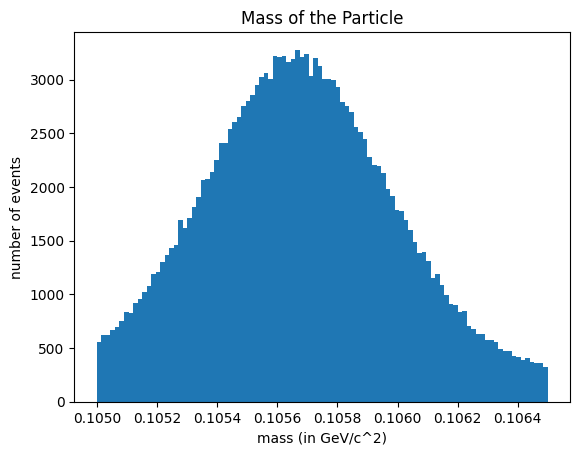

In [ ]:
#plt.hist(data['mass'], bins=100, range=[0.05,0.14], log=False)  # makes the histogram
plt.hist(data['mass'], bins=100, range=[0.105,0.1065], log=False)  # zooms in to a much smaller mass range - much more precise in our target - thank you Frank for this tip!

plt.title("Mass of the Particle")
plt.xlabel("mass (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(False);

## Part Four
The code above may take a few moments to run since it's grabbing a pretty big data set (>400,000 events!?). When it's finished, you'll see a histogram of the invariant mass values you calucalted for muon 1 in each event. This is called a *mass plot*.
- You'll probably need to adjust the histogram's range and number of bins to see a clear peak. The x-value of that peak occurs at the invariant mass of the particle (in this case, a muon).
- Based on your histogram, what value does the muon's invariant mass seem to be?
- Try replacing the histogram's title and x-axis label to something better.

## Part Five
Now that you've analyzed your own huge set of particle collision events, here are some follow-up questions:
- How does the value you calculated compare to the accepted mass of the [muon](https://en.wikipedia.org/wiki/Muon)? Is it very different, if so why might that be?
- Why doesn't energy have x, y, and z components like momentum?
- How does E<sup>2</sup> - p<sup>2</sup> give you a unit of mass<sup>2</sup>?

## More Tools
The cells below show some more advanced techniques.

In [ ]:
# run this command to make your plots look like they're from xkcd.com
#plt.xkcd();
# then re-execute your code to make a plot and see it xkcd-ified.

In [ ]:
# run this cell to make normal-looking plots again
mpl.rcdefaults()

A professional physicist would usually fit a theoretical curve to the mass plot to identify the particle's invariant mass. For reconstructing more complex particle decays they'd use a [relativistic Breit-Wigner](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution) curve, but we'll try it here just for practice.
- First, choose some parameters for the curve based on where the peak is on your histogram and how wide it looks.
- Then, run the code and keep adjusting the parameters until the curve tightly fits the peak.

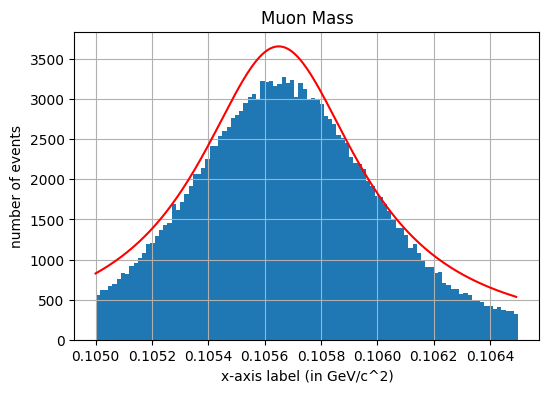

In [ ]:
# set the Breit-Wigner parameters with the much more precise parameters
xmin = 0.105  # lower bound for your plot
xmax = 0.1065  # upper bound for your plot
particle_mass = 0.10565 # the x-value of the peak
width = .0007 # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 0.00002  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/200) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot

fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(data['mass'], bins=100, range=[0.105,0.1065], log=False)  # plots the histogram
ax.plot(x, y, color='r')  # plots the curve
plt.title("Muon Mass")
plt.xlabel("x-axis label (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);

In [ ]:
print("mass = ", np.round(particle_mass,6), " GeV/c^2")
hbar = 6.582e-25      # in GeV*s
c=3*10**8 #c^2 needs to be taken into account
print("mean lifetime = ", np.format_float_scientific((hbar* c**2)/width,6), " seconds")

#accepted lifetime is 2.2 microseconds

mass =  0.10565  GeV/c^2
mean lifetime =  8.462571e-05  seconds


All those other tries!

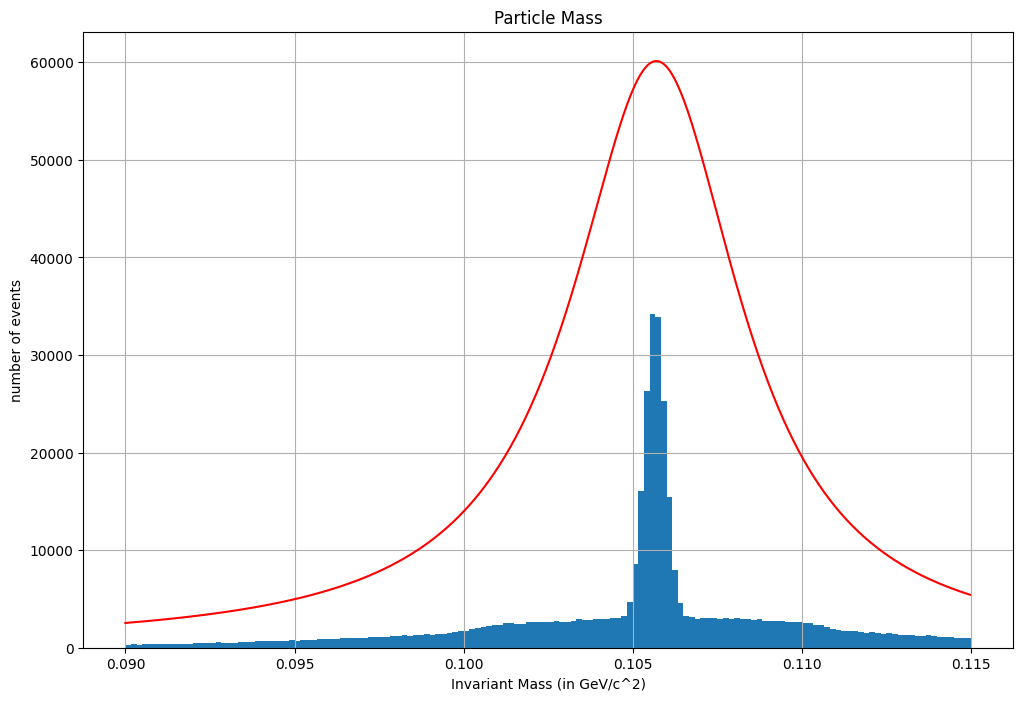

In [ ]:
# set the Breit-Wigner parameters
xmin = 0.09  # lower bound for your plot
xmax = 0.115  # upper bound for your plot
particle_mass = .1057 # the x-value of the peak
width = .0061   # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 0.025  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/1000) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.hist(data['mass'], bins=150, range=[xmin,xmax], log=False)  # plots the histogram
ax.plot(x,y, color='r')  # plots the curve

plt.title("Particle Mass")
plt.xlabel("Invariant Mass (in GeV/c^2)")
plt.ylabel("number of events")
plt.grid(True);

#can make y axis a log scale!
#Better fit gives a better uncertainty of the muon mass

If you finally have a curve that pretty closely fits the peak in your histogram, take a look at the parameters you set. We can use those to determine the particle's mass and lifetime. The invariant mass of the particle is your *particle_mass*. The particle's mean lifetime is h-bar/width.
- How do the values below compare with the accepted values for mass and lifetime of the muon?
They probably don't agree very well because we're applying the Breit-Wigner curve to a particle we observed (not valid) instead of one we're trying to reconstruct from analyzing its decay products. If you ever find yourself doing a *mass reconstruction* to discover a short-lived particle by its decay products, this will might be useful.

In [ ]:
print("mass = ", np.round(particle_mass,6), " GeV/c^2")
hbar = 6.6e-25      # in GeV*s
c=3*10**8 #c^2 needs to be taken into account
print("mean lifetime = ", np.format_float_scientific((hbar* c**2)/width,6), " seconds")

#accepted lifetime is 2.2 microseconds

mass =  0.1057  GeV/c^2
mean lifetime =  9.737705e-06  seconds


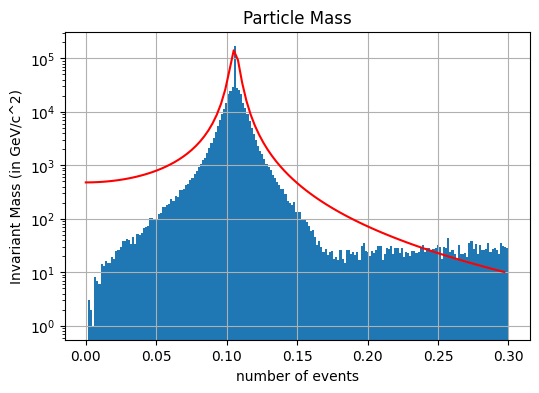

In [ ]:
# set the Breit-Wigner parameters
xmin = 0  # lower bound for your plot
xmax = 0.3  # upper bound for your plot
particle_mass = .1057 # the x-value of the peak
width = .006   # width of the peak halfway up; a.k.a. "full width at half max" or FWHM
K = 0.06  # a constant that affects the height of the curve, you'll need to tinker with this some

# calculate the Breit-Wigner curve
x = np.arange(xmin, xmax, (xmax-xmin)/100) # makes a series of equally spaced x-values
y = K / ((x**2 - particle_mass**2)**2 + (particle_mass*width)**2) # calculates the y-values for the B-W curve

# make the plot
fig, ax = plt.subplots(1,1, figsize=(6,4))
ax.hist(data['mass'], bins=200, range=[xmin,xmax], log=True)  # plots the histogram
ax.plot(x,y, color='r')  # plots the curve

plt.title("Particle Mass")
plt.xlabel("number of events")
plt.ylabel("Invariant Mass (in GeV/c^2)")
plt.grid(True);

#can make y axis a log scale!

In [ ]:
print("mass = ", np.round(particle_mass,6), " GeV/c^2")
hbar = 6.6e-25      # in GeV*s
c=3*10**8 #c^2 needs to be taken into account
print("mean lifetime = ", np.format_float_scientific((hbar* c**2)/width,6), " seconds")

#accepted lifetime is 2.2 microseconds

mass =  0.1057  GeV/c^2
mean lifetime =  9.9e-06  seconds


---
## Saving Your Work
This is running on a Google server on a distant planet and deletes what you've done when you close this tab. To save your work for later use or analysis you have a few options:
- File > "Save a copy in Drive" will save it to you Google Drive in a folder called "Collaboratory". You can run it later from there.
- File > "Download .ipynb" to save to your computer (and run with Jupyter software later)
- File > Print to ... um ... print.
- To save an image of a graph or chart, right-click on it and select Save Image as ...

## Credits
This notebook was designed by [Quarknet](https://quarknet.org/) Teaching and Learning Fellow [Adam LaMee](https://adamlamee.github.io/) and UCF Physics undergrad Brooke Emison. The handy csv files were created from the CMS Run2011A primary datasets and converted from ROOT format by the masterful [Tom McCauley](https://github.com/tpmccauley). More can be found on the [CERN OpenData](http://opendata.cern.ch/?ln=en) site, like [here](http://opendata.cern.ch/record/545). The 3D vector image can be found on [WikiMedia Commons](https://commons.wikimedia.org/wiki/File:Coord_XYZ.svg). Finally, thanks to the great folks at [Binder](https://mybinder.org/) and [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb) for making this notebook interactive without you needing to download it or install [Jupyter](https://jupyter.org/) on your own device. Find more activities and license info at [CODINGinK12.org](http://www.codingink12.org).